<a href="https://colab.research.google.com/github/ansonsibi1/Book_Recommendation_System_Anson_Sibi/blob/main/Book_Recommendation_System_Anson_Sibi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**BOOK RECOMMENDATION SYSTEM**

#**Problem Statement**

During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such
web services, recommender systems have taken more and more place in our lives. From
e-commerce (suggest to buyers articles that could interest them) to online advertisement
(suggest to users the right contents, matching their preferences), recommender systems are
today unavoidable in our daily online journeys.
<br>
In a very general way, recommender systems are algorithms aimed at suggesting relevant
items to users (items being movies to watch, text to read, products to buy, or anything else
depending on industries).<br>
Recommender systems are really critical in some industries as they can generate a huge
amount of income when they are efficient or also be a way to stand out significantly from
competitors. The main objective is to create a book recommendation system for users.

In [1]:
#Importing modules
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
# This is to supress the warning messages (if any) generated in our code
import warnings
warnings.filterwarnings('ignore')


#**The Data**

The Book-Crossing dataset comprises 3 files.<br>
● Users :<br>
Contains the users. Note that user IDs (User-ID) have been anonymized and map to
integers. Demographic data is provided (Location, Age) if available. Otherwise, these
fields contain NULL values.<br>
● Books : <br>
Books are identified by their respective ISBN. Invalid ISBNs have already been removed
from the dataset. Moreover, some content-based information is given (Book-Title,
Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web
Services. Note that in the case of several authors, only the first is provided. URLs linking
to cover images are also given, appearing in three different flavors (Image-URL-S,
Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the
Amazon website.<br>
● Ratings :<br> 
Contains the book rating information. Ratings (Book-Rating) are either explicit,
expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit,
expressed by 0.

In [2]:
#Books data
books=pd.read_csv('/content/drive/MyDrive/Almabetter/Project/Book recommendation system - Capstone project 4/Books.csv')
books.head()

ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author Year-Of-Publication                   Publisher  \
0    Mark P. O. Morford                2002     Oxford University Press   
1  Richard Bruce Wright                2001       HarperFlamingo Canada   
2          Carlo D'Este                1991             HarperPerennial   
3      Gina Bari Kolata                1999        Farrar Straus Giroux   
4       E. J. W. Barber                1999  W. W. Norton &amp; Company   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-M  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-L  
0  http://images.amazon.com/images/P/0195153448.0...  
1  http://images.amazon.com/images/P/0002005018.0...  
2  http://images.amazon.com/images/P/0060973129.0...  
3  http://images.amazon.com/images/P/0374157065.0...  
4  http://images.amazon.com/images/P/0393045218.0...

In [3]:
#Users data
users=pd.read_csv('/content/drive/MyDrive/Almabetter/Project/Book recommendation system - Capstone project 4/Users.csv')
users.head()

User-ID                            Location   Age
0        1                  nyc, new york, usa   NaN
1        2           stockton, california, usa  18.0
2        3     moscow, yukon territory, russia   NaN
3        4           porto, v.n.gaia, portugal  17.0
4        5  farnborough, hants, united kingdom   NaN

In [4]:
#Ratings Data
ratings=pd.read_csv('/content/drive/MyDrive/Almabetter/Project/Book recommendation system - Capstone project 4/Ratings.csv')
ratings.head()

User-ID        ISBN  Book-Rating
0   276725  034545104X            0
1   276726  0155061224            5
2   276727  0446520802            0
3   276729  052165615X            3
4   276729  0521795028            6

#**Data Preprocessing And EDA**

##**Books**

In [5]:
#book dataset information
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [6]:
#missing values in each column
L=((books.isnull().sum()).sort_values()).to_dict()
for i in L:
    print(i,"--->",L[i]) 

ISBN ---> 0
Book-Title ---> 0
Year-Of-Publication ---> 0
Image-URL-S ---> 0
Image-URL-M ---> 0
Book-Author ---> 1
Publisher ---> 2
Image-URL-L ---> 3


In [7]:
#number of unique values in isbn and book_title
print("unique isbn: ",len(books["ISBN"].unique()))
print("total rows: ",books.shape[0])
print("unique title: ",len(books["Book-Title"].unique()))
print("total rows: ",books.shape[0])

unique isbn:  271360
total rows:  271360
unique title:  242135
total rows:  271360


we can see that some titles are repeated

In [8]:
#filling missing values
books['Book-Author'].fillna("Unknown",inplace=True)
books['Publisher'].fillna("Unknown",inplace=True)
books.dropna(axis=0,inplace=True)
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

Text(0.5, 1.0, 'Top 10 Authors')

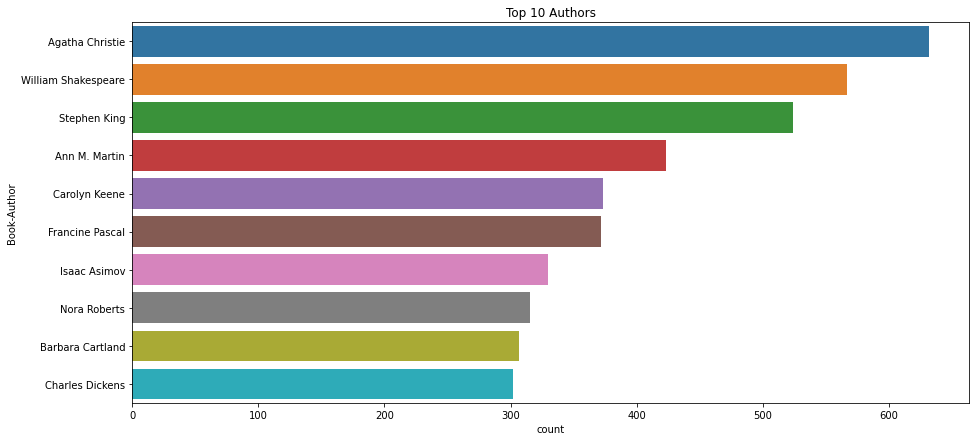

In [9]:
#Top book authors
plt.figure(figsize=(15,7))
sns.countplot(y='Book-Author',data=books,order=pd.value_counts(books['Book-Author']).iloc[:10].index)
plt.title('Top 10 Authors')

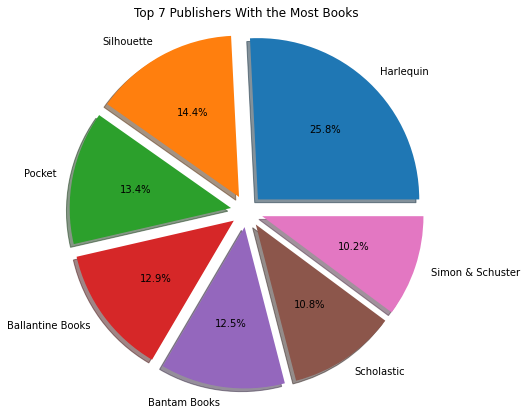

In [10]:
#plotting the top 7 publishers
my_dict=(books['Publisher'].value_counts()).to_dict()
count= pd.DataFrame(list(my_dict.items()),columns = ['c','count'])
a = count.sort_values(by=['count'], ascending = False)
a.head(7)
labels = 'Harlequin','Silhouette','Pocket','Ballantine Books','Bantam Books','Scholastic','Simon & Schuster'
sizes = [count['count'].iloc[0],count['count'].iloc[1],count['count'].iloc[2],count['count'].iloc[3],count['count'].iloc[4],
         count['count'].iloc[5],count['count'].iloc[6]]
explode = (0.1, 0.1, 0.1, 0.1,0.1, 0.1,0.1 )
fig1 , ax1 = plt.subplots(figsize=(7,7))
ax1.pie(sizes,
        explode = explode,
        labels = labels,
        autopct = '%1.1f%%',
        shadow = True,
        startangle = 0)
plt.title("Top 7 Publishers With the Most Books")
ax1.axis ('equal')
plt.show()

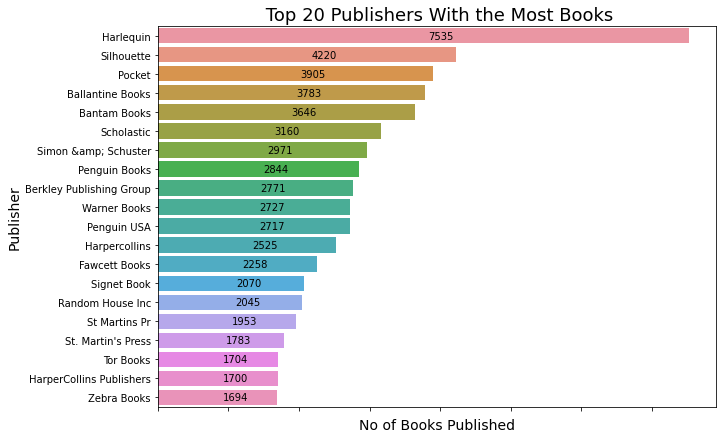

In [11]:
b = count.sort_values(by=['count'], ascending = False)
b = b.head(20)
x =['Harlequin','Silhouette','Pocket','Ballantine Books','Bantam Books','Scholastic','Simon &amp; Schuster']
y = [7537,4220,3905,3783,3646,3160,2971]
fig=plt.figure(figsize=(10,7))
ax = sns.barplot(x = 'count',y = 'c' , data = b)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90,horizontalalignment='center')
plt.xlabel("No of Books Published", size=14)
plt.ylabel("Publisher", size=14)
plt.title(" Top 20 Publishers With the Most Books", size=18)
for p in ax.patches:
    ax.annotate("%.0f" % p.get_width(), xy=(p.get_width()/2, p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")
plt.show()

Harlequin,Silhouette,Pocket,Ballantine Books,Bantam Books,Scholastic,Simon & Schuster are the top 7 publishers given in the book dataset.

In [12]:
#unique values in year of publication.
np.set_printoptions(threshold=np.inf)
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

we can see that the years are object type and we have zeros as well as there is some error by including names in years



In [13]:
#changing the datatype of year of publication
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(str).astype(int)
#replacing 0 with most occuring year.
books['Year-Of-Publication'].replace({0:books['Year-Of-Publication'].value_counts().idxmax()},inplace=True)
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 1968, 1961, 1958, 1974, 1976,
       1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960, 1966,
       1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954, 1950,
       1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011, 1925,
       1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030, 1911,
       1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934, 1910,
       1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901, 2010,
       1908, 1906, 1935, 1806, 2021, 2012, 2006, 1909, 2008, 1378, 1919,
       1922, 1897, 2024, 1376, 2037])

Text(0.5, 1.0, 'Find outlier data in Year-Of-Publication column')

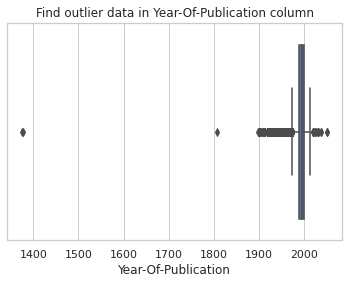

In [14]:
#Outlier Detection in year of publication column
sns.set_theme(style="whitegrid")
sns.boxplot(x='Year-Of-Publication', data=books)
plt.title('Find outlier data in Year-Of-Publication column')

In [15]:
#We can remove book published after 2020
books=books[books['Year-Of-Publication'] <= 2020]

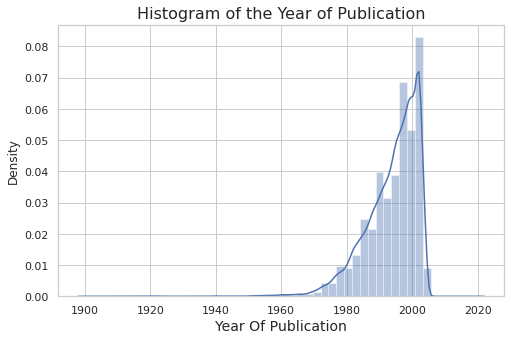

In [16]:
#Distribution of publication of books yearwise between 1900 and 2020
fig=plt.figure(figsize=(8,5))
y1 = books[books['Year-Of-Publication'] >= 1900]
y1 = y1[y1['Year-Of-Publication'] <= 2020]
sns.distplot(y1['Year-Of-Publication'])
plt.xlabel('Year Of Publication',size=14)
plt.title('Histogram of the Year of Publication',size=16)
plt.show()

We can see that publishing of books increases with year.

##**Users**

In [17]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [18]:
#Function to get percentage of missing values
def missing_values(df):
  columns=df.columns
  missing=[]
  percentage=[]
  for i in columns:
    x=df[i].isnull().sum()
    missing.append(x)
    percentage.append((x/len(df))*100)
  data={'Features':columns,'Missing':missing ,'Percentage of total values':percentage}
  return pd.DataFrame(data).reset_index(drop=True) 


In [19]:
#Finding missing values in Users dataset
missing_values(users)

Features  Missing  Percentage of total values
0   User-ID        0                    0.000000
1  Location        0                    0.000000
2       Age   110762                   39.719857

Text(0.5, 1.0, 'Find outlier data in Age column')

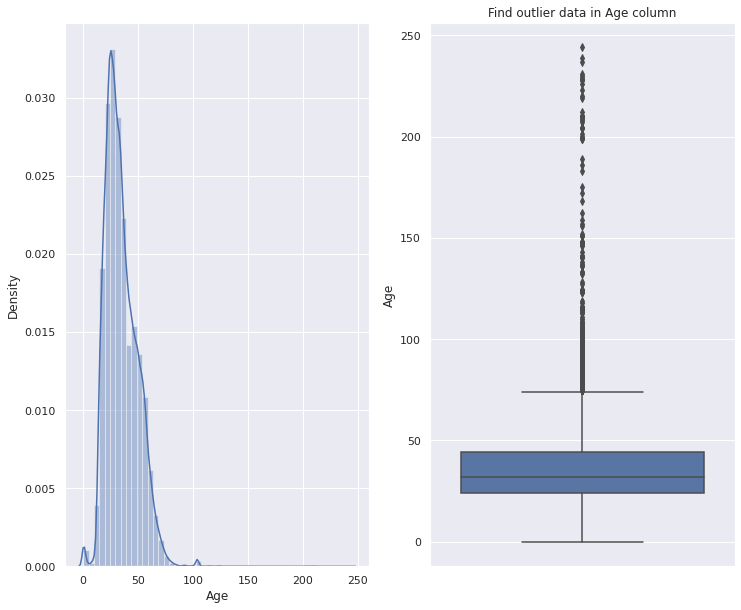

In [20]:
sns.set_theme();
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,10))

#Age Distribution
sns.distplot(users['Age'],ax=ax1)
plt.title('Distribution of Age')

#Outlier Detection in Age column
sns.boxplot(y='Age', data=users,ax=ax2)
plt.title('Find outlier data in Age column')



1.   Age distribution is positively skewed.
2.   There are outliers in age column.As Age distribution is positively skewed median is used to remove outliers and replace missing values.



In [21]:
#Replacing NaN values in Age column.
users['Age'].fillna(users['Age'].value_counts().median(),inplace=True)

#Removing outliers in Age.
for i in users['Age'][users['Age']>95]:
        users['Age'].replace({i:users['Age'].value_counts().median()},inplace=True)
for i in users['Age'][users['Age']==0]:
        users['Age'].replace({i:users['Age'].value_counts().median()},inplace=True)
users['Age'] = users['Age'].astype(int) 
users['Age'].unique()

array([ 26,  18,  17,  61,  14,  25,  19,  46,  55,  32,  24,  20,  34,
        23,  51,  31,  21,  44,  30,  57,  43,  37,  41,  54,  42,  50,
        39,  53,  47,  36,  28,  35,  13,  58,  49,  38,  45,  62,  63,
        27,  33,  29,  66,  40,  15,  60, 286,  79,  22,  16,  65,  59,
        48,  72,  56,  67,   1,  80,  52,  69,  71,  73,  78,   9,  64,
        12,  74,  75,   3,  76,  83,  68,  11,  77,   2,  70,  93,   8,
         7,   4,  81,  10,   5,   6,  84,  82,  90,  91,  94,  85,  86,
        92,  87,  95,  89,  88, 181, 109, 119, 116, 120, 121, 145, 170,
       192, 193, 197, 201, 212, 223, 254])

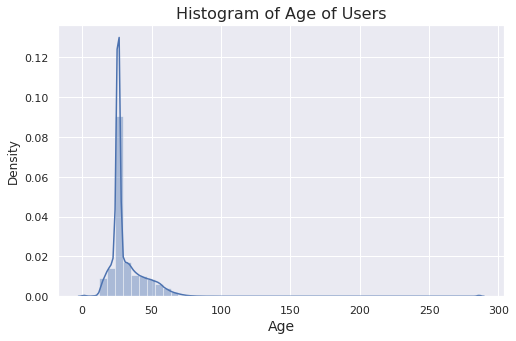

In [22]:
#Distribution of age after cleaning.
fig=plt.figure(figsize=(8,5))
sns.distplot(users['Age'])
plt.xlabel('Age',size=14)
plt.title('Histogram of Age of Users',size=16)
plt.show()

In [23]:
users['Location']

0                         nyc, new york, usa
1                  stockton, california, usa
2            moscow, yukon territory, russia
3                  porto, v.n.gaia, portugal
4         farnborough, hants, united kingdom
                         ...                
278853                 portland, oregon, usa
278854    tacoma, washington, united kingdom
278855             brampton, ontario, canada
278856             knoxville, tennessee, usa
278857                  dublin, n/a, ireland
Name: Location, Length: 278858, dtype: object

In [24]:
#Creating new columns using the feature Location.
users[['city','state','country']]=users['Location'].apply(lambda x: pd.Series(str(x).split(",")[:3]))
users.drop(['Location'],axis=1,inplace=True)
users

User-ID  Age         city             state          country
0             1   26          nyc          new york              usa
1             2   18     stockton        california              usa
2             3   26       moscow   yukon territory           russia
3             4   17        porto          v.n.gaia         portugal
4             5   26  farnborough             hants   united kingdom
...         ...  ...          ...               ...              ...
278853   278854   26     portland            oregon              usa
278854   278855   50       tacoma        washington   united kingdom
278855   278856   26     brampton           ontario           canada
278856   278857   26    knoxville         tennessee              usa
278857   278858   26       dublin               n/a          ireland

[278858 rows x 5 columns]

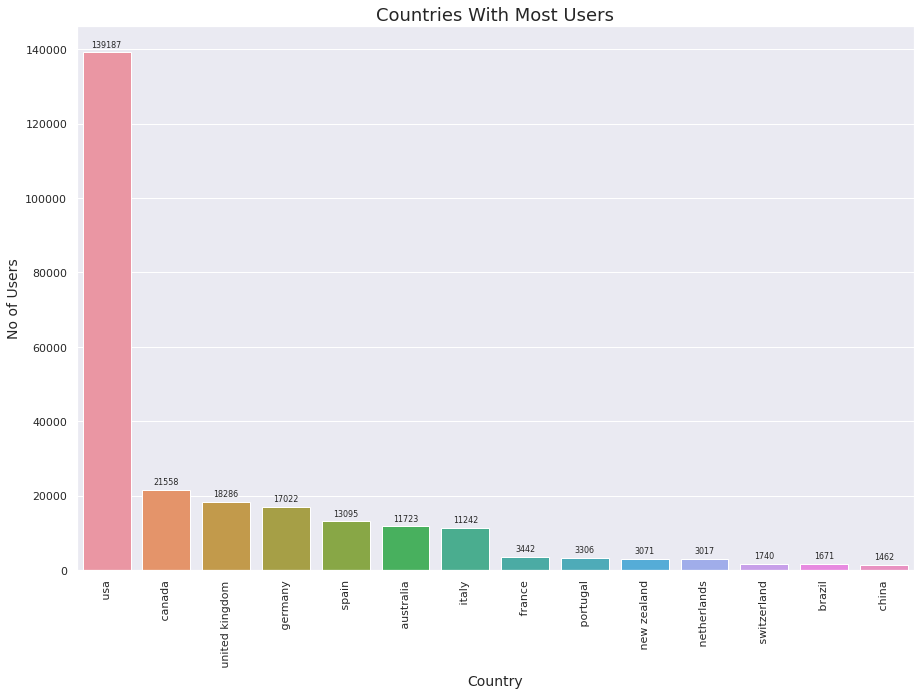

In [25]:
#Countries with most users
my_dict=(users['country'].value_counts()).to_dict()
count= pd.DataFrame(list(my_dict.items()),columns = ['c','count'])
f = count.sort_values(by=['count'], ascending = False)
f = f.head(15)
f.drop(7,inplace=True)
fig=plt.figure(figsize=(15,10))
ax = sns.barplot(y = 'count',x= 'c' , data = f)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90,horizontalalignment='center')
for bar in ax.patches: 
    ax.annotate(format(bar.get_height(), '.0f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=8, xytext=(0,8), 
                   textcoords='offset points') 
plt.xlabel("Country", size=14)
plt.ylabel("No of Users", size=14)
plt.title("Countries With Most Users", size=18)
plt.show()

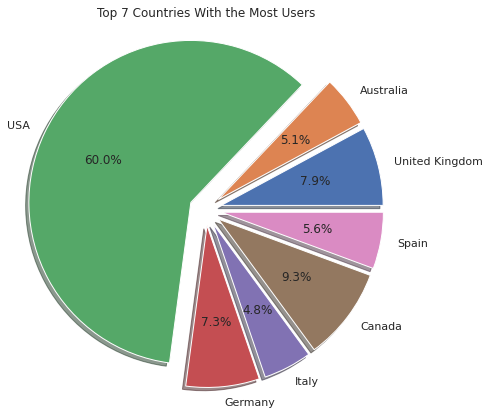

In [26]:
# Pie chart showing countries with most number of users 
my_dict=(users['country'].value_counts()).to_dict()
count= pd.DataFrame(list(my_dict.items()),columns = ['c','count'])
a = count.sort_values(by=['count'], ascending = False)
a.head(7)
labels = 'United Kingdom','Australia','USA','Germany','Italy','Canada','Spain'
sizes = [count['count'].iloc[2],count['count'].iloc[5],count['count'].iloc[0],count['count'].iloc[3],count['count'].iloc[6],
         count['count'].iloc[1],count['count'].iloc[4]]
explode = (0.1, 0.1, 0.1, 0.1,0.1, 0.1,0.1 )

fig1 , ax1 = plt.subplots(figsize=(7,7))

ax1.pie(sizes,
        explode = explode,
        labels = labels,
        autopct = '%1.1f%%',
        shadow = True,
        startangle = 0)
plt.title("Top 7 Countries With the Most Users")
ax1.axis ('equal')

plt.show()




*   Users Dataset has three columns User-Id ,Location and Age
*   The column age has large number of missing values and outliers.

*   USA has the highest number of users followed by Canada and UK.
  



##**Rating**

In [27]:
#Shape of the dataset
print(ratings.shape)
ratings.columns=['User-ID','ISBN','Book-Rating']
ratings.head()

(1149780, 3)


User-ID        ISBN  Book-Rating
0   276725  034545104X            0
1   276726  0155061224            5
2   276727  0446520802            0
3   276729  052165615X            3
4   276729  0521795028            6

In [28]:
#Finding missing values in ratings dataset
missing_values(ratings)

Features  Missing  Percentage of total values
0      User-ID        0                         0.0
1         ISBN        0                         0.0
2  Book-Rating        0                         0.0

In [29]:
#Finding the unique values in Rating column.
ratings['Book-Rating'].unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2])

**So there are no outliers in Rating column.**

In [30]:
filter1 = ratings[ratings["User-ID"].isin(users["User-ID"])] 
df_ratings=filter1[filter1["ISBN"].isin(books["ISBN"])] 
df=pd.merge(users,df_ratings,on='User-ID')
df

User-ID  Age      city        state  country        ISBN  Book-Rating
0              2   18  stockton   california      usa  0195153448            0
1              8   26   timmins      ontario   canada  0002005018            5
2              8   26   timmins      ontario   canada  0060973129            0
3              8   26   timmins      ontario   canada  0374157065            0
4              8   26   timmins      ontario   canada  0393045218            0
...          ...  ...       ...          ...      ...         ...          ...
1031070   278854   26  portland       oregon      usa  0425163393            7
1031071   278854   26  portland       oregon      usa  0515087122            0
1031072   278854   26  portland       oregon      usa  0553275739            6
1031073   278854   26  portland       oregon      usa  0553578596            0
1031074   278854   26  portland       oregon      usa  0553579606            8

[1031075 rows x 7 columns]

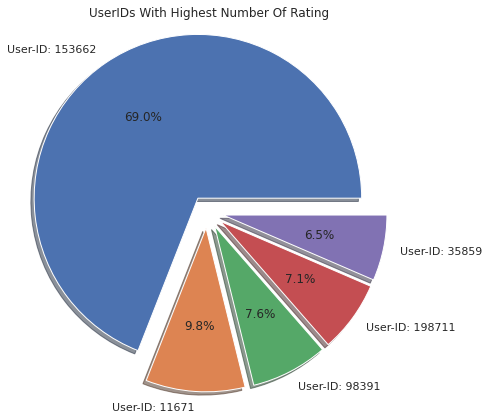

In [31]:
my_dict=(df_ratings['Book-Rating'].value_counts()).to_dict()
count= pd.DataFrame(list(my_dict.items()),columns = ['c','count'])
a = count.sort_values(by=['count'], ascending = False)
a.head(7)
labels = 'User-ID: 153662','User-ID: 11671','User-ID: 98391','User-ID: 198711','User-ID: 35859'
sizes = [count['count'].iloc[0],count['count'].iloc[1],count['count'].iloc[2],count['count'].iloc[3],count['count'].iloc[4]]
explode = (0.1, 0.1, 0.1, 0.1,0.1)

fig1 , ax1 = plt.subplots(figsize=(7,7))

ax1.pie(sizes,
        explode = explode,
        labels = labels,
        autopct = '%1.1f%%',
        shadow = True,
        startangle = 0)
plt.title("UserIDs With Highest Number Of Rating")
ax1.axis ('equal')

plt.show()

In [32]:
df_ratings=df_ratings[df_ratings['Book-Rating']>0]
df_ratings['Book-Rating'].value_counts()

8     91799
10    71221
7     66397
9     60772
5     45353
6     31683
4      7616
3      5118
2      2375
1      1481
Name: Book-Rating, dtype: int64

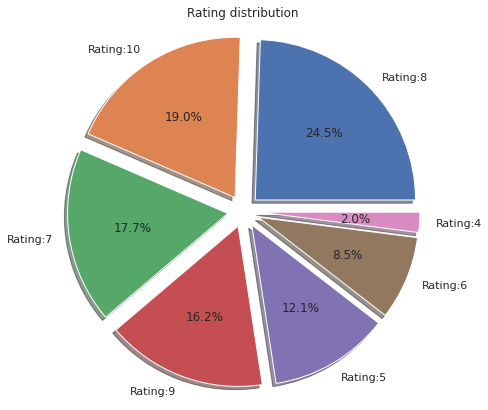

In [33]:
# Pie chart showing users rated with highest number of ratings given to books.
my_dict=(df_ratings['Book-Rating'].value_counts()).to_dict()
count= pd.DataFrame(list(my_dict.items()),columns = ['c','count'])
a = count.sort_values(by=['count'], ascending = False)
labels = 'Rating:8','Rating:10','Rating:7','Rating:9','Rating:5','Rating:6','Rating:4'
sizes = [count['count'].iloc[0],count['count'].iloc[1],count['count'].iloc[2],count['count'].iloc[3],count['count'].iloc[4],
         count['count'].iloc[5],count['count'].iloc[6]]
explode = (0.1, 0.1, 0.1, 0.1,0.1, 0.1,0.1 )

fig1 , ax1 = plt.subplots(figsize=(7,7))

ax1.pie(sizes,
        explode = explode,
        labels = labels,
        autopct = '%1.1f%%',
        shadow = True,
        startangle = 0)
plt.title("Rating distribution")
ax1.axis ('equal')

plt.show()

#**Merging datasets**

In [34]:
#merging datasets
temp_df = books.merge(df_ratings, how='left', on='ISBN')
final_df = temp_df.merge(users, how='left', on='User-ID')
final_df.shape

(505333, 14)

In [35]:
# Data Preprocessing
final_df.drop(['Image-URL-S', 'Image-URL-M','Image-URL-L'], axis=1, inplace=True)
final_df.dropna(inplace=True)

final_df['User-ID'] = final_df['User-ID'].astype('int')

In [36]:
final_df.sample(5)

ISBN                                         Book-Title  \
206664  0671024582                           Power (L.a. Connections)   
317909  0373791275          As You Like It (Harlequin Blaze, No. 123)   
441359  0934411301     Who Wears the Tux the Great American Dyke Quiz   
503335  0449209792  Queen of This Realm: The Story of Elizabeth I ...   
209879  0743400445                           The Faith Trials, Vol. 1   

           Book-Author  Year-Of-Publication                      Publisher  \
206664  Jackie Collins                 1998                   Pocket Books   
317909      Lori Wilde                 2004                      Harlequin   
441359    Julia Willis                 1990                   Banned Books   
503335     Jean Plaidy                 1989                  Fawcett Books   
209879  James Laurence                 2001  Simon Spotlight Entertainment   

        User-ID  Book-Rating   Age            city  \
206664   231857          5.0  46.0        canberra   
317909   114368          5.0  33.0  mechanicsville   
441359   123597          6.0  44.0         toronto   
503335   241033          3.0  26.0        columbus   
209879   203240          5.0  32.0       st. louis   

                                state     country  
206664   australian capital territory   australia  
317909                       maryland         usa  
441359                        ontario      canada  
503335                           ohio         usa  
209879                       missouri         usa

#**Popularity Based**

As the name suggests Popularity based recommendation system works with the trend. It basically uses the items which are in trend right now. For example, if any book which is usually bought by every new user then there are chances that it may suggest that book to the user who just signed up.<br>
Book weighted avg formula:<br>
Weighted Rating(WR)=[vR/(v+m)]+[mC/(v+m)]<br>
where,<br>
v is the number of votes for the books;<br>
m is the minimum votes required to be listed in the chart;<br>
R is the average rating of the book; and<br>
C is the mean vote across the whole report.<br>
Now we find the values of v,m,R,C.

In [37]:
# Create column Rating average 
final_df['Avg_Rating']=final_df.groupby('ISBN')['Book-Rating'].transform('mean')
# Create column Rating sum
final_df['Total_No_Of_Users_Rated']=final_df.groupby('ISBN')['Book-Rating'].transform('count')

In [38]:
C= final_df['Avg_Rating'].mean()
m= final_df['Total_No_Of_Users_Rated'].quantile(0.90)
Top_Books = final_df.loc[final_df['Total_No_Of_Users_Rated'] >= m]
print(f'C={C} , m={m}')
Top_Books.shape

C=7.6266977580345365 , m=64.0


(38570, 13)

Here we used 90th percentile as our cutoff. In other words, for a book to feature in the charts, it must have more votes than at least 90% of the books in the list.<br>
We see that there are 38570 books which qualify to be in this list. Now, we need to calculate our metric for each qualified book. To do this, we will define a function, weighted_rating() and define a new feature score, of which we’ll calculate the value by applying this function to our DataFrame of qualified books:


In [41]:
def weighted_rating(x, m=m, C=C):
    v = x['Total_No_Of_Users_Rated']
    R = x['Avg_Rating']
    return (v/(v+m) * R) + (m/(m+v) * C)
    
 
Top_Books['Score'] = Top_Books.apply(weighted_rating,axis=1)
 
 #Keeping only one entry of each book
Top_Books=Top_Books.sort_values('Score', ascending=False).drop_duplicates('ISBN').sort_index()

#Sorting books based on score calculated above
Top_Books = Top_Books.sort_values('Score', ascending=False)
Top_Books_list=Top_Books['Book-Title'].tolist()

In [44]:
import requests
from PIL import Image

In [66]:
#Creating a function to recommend books based on popularity based .
def popularity_based(n):
  '''
  n=number of top books to be recommended
  '''
  #Creating a dataframe of recommended n books based on score.
  data=Top_Books[['Book-Title', 'Total_No_Of_Users_Rated', 'Avg_Rating', 'Score']].reset_index(drop=True).head(n)
    
  
  fig, axs = plt.subplots(1, n,figsize=(20,8))
  fig.suptitle('Book Recommendations', size = 22)
  for i in range(n):
    #plotting images of recommended books with average rating.
    url = books.loc[books['Book-Title'] ==Top_Books_list[i],'Image-URL-L'][:1].values[0]
    im = Image.open(requests.get(url, stream=True).raw)
    axs[i].imshow(im)
    axs[i].axis("off")
    fig.show()
  return data

Book-Title  Total_No_Of_Users_Rated  \
0       Harry Potter and the Goblet of Fire (Book 4)                      137   
1  Harry Potter and the Sorcerer's Stone (Harry P...                      313   
2  Harry Potter and the Order of the Phoenix (Boo...                      206   
3                              To Kill a Mockingbird                      214   
4  Harry Potter and the Prisoner of Azkaban (Book 3)                      133   
5  The Return of the King (The Lord of the Rings,...                       77   

   Avg_Rating     Score  
0    9.262774  8.741834  
1    8.939297  8.716469  
2    9.033981  8.700402  
3    8.943925  8.640679  
4    9.082707  8.609689  
5    9.402597  8.596515

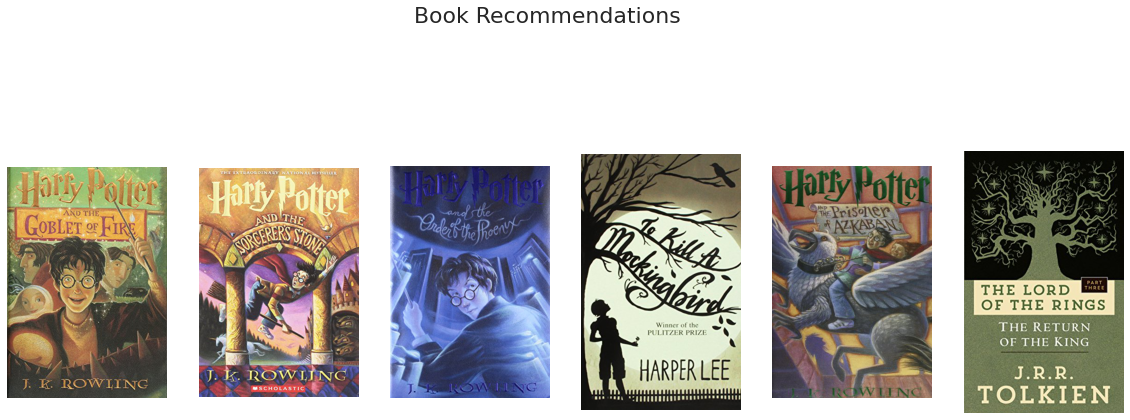

In [67]:
popularity_based(6)

#**Memory Based Collaborative Filtering**

##**Item -Based Collaborative filtering**

In [ ]:
# We can calculate the ratings of the books and eliminate the rare books by determining a threshold which is 5 in this case by removing the main dataframe.
# Finally, we have common books which are rated more than 8.
rating_book = pd.DataFrame(final_df['Book-Title'].value_counts())
final_df['Book-Title'].value_counts().mean() # 

rare_books = rating_book[rating_book['Book-Title'] <=10].index

common_books = final_df[~final_df["Book-Title"].isin(rare_books)]
common_books['Book-Title'].value_counts().mean() 

30.311719214753122

In [ ]:
# Creating User-Item Matrix Dataframe
user_book_matrix = common_books.pivot_table(index=['User-ID'], columns=['Book-Title'], values='Book-Rating').fillna(0)
user_book_matrix.shape

(41536, 5043)

In [ ]:
#Creating a compressed sparse row matrix of user_book_matrix.
from scipy.sparse import csr_matrix
csr_data = csr_matrix(user_book_matrix.values)


In [ ]:

df=user_book_matrix.T

Here ,we explore the relationship between the pair of items .Item-item collaborative filtering is one kind of recommendation method which looks for similar items based on the items users have already liked or positively interacted with.
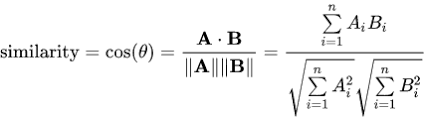

In [ ]:
#NearestNeighbors algorithm is used to find similar items and similarity measure used is cosine.
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(metric='cosine', algorithm='brute',n_neighbors=6)
knn.fit(df.values)
distances, indices = knn.kneighbors(df.values)

In [ ]:
#printing similar books based on the ith index.
for i in indices[188]:
  print(df.index[indices[i]].values)

['About Face' 'No Place Like Home (Holiday Classics)'
 'Late Bloomer (Michaels, Fern)' 'Exposure' 'Light in Shadow'
 "Her Father's House"]
['No Place Like Home (Holiday Classics)' 'About Face' 'Light in Shadow'
 'Kentucky Heat' 'Celeste (Gemini)' 'A Man to Call My Own : A Novel']
['Late Bloomer (Michaels, Fern)' 'Dangerous' 'About Face'
 'Engaging The Enemy' 'Exposure' 'Hurricane Bay']
['Exposure' 'Blood Orchid (Holly Barker Novels (Hardcover))'
 'Say When : A Novel' 'Late Bloomer (Michaels, Fern)' 'Cyanide Wells'
 'Finders Keepers']
['Light in Shadow' 'No Place Like Home (Holiday Classics)' 'Cold Blooded'
 'About Face' 'Celeste (Gemini)' 'With A Southern Touch']
["Her Father's House" 'Exposure' 'The Falls'
 'Late Bloomer (Michaels, Fern)' 'Finders Keepers' 'The Future Scrolls']


In [ ]:
#Creating a function to recommend books based on item similarity.
def item_based_reco(book_name):

  #Creating a dataframe of recommended books based on score.
    book_id=np.where(df.index==book_name)[0][0]
    lis=df.index[indices[book_id]].values.tolist()[1:]
    score=distances[book_id].tolist()[1:]
    data={'Book Recommendations':lis ,'Similarity Score':score}
    
  
    fig, axs = plt.subplots(1, 5,figsize=(20,8))
    fig.suptitle('Book Recommendations', size = 22)
    for i in range(len(lis)):
     #plotting images of recommended books with average rating.
      url = books.loc[books['Book-Title'] ==lis[i],'Image-URL-L'][:1].values[0]
      im = Image.open(requests.get(url, stream=True).raw)
      axs[i].imshow(im)
      axs[i].axis("off")
      axs[i].set_title('Rating: {}'.format(round(common_books[common_books['Book-Title'] == lis[i]]['Book-Rating'].mean(),1)),
                    y=-0.18,
                        color="red",
                        fontsize=18)
      fig.show()
    return pd.DataFrame(data)

Book Recommendations  Similarity Score
0         The Brethren          0.904865
1            The Judge          0.916810
2             The Firm          0.920558
3          The Summons          0.922756
4    The Pelican Brief          0.922822

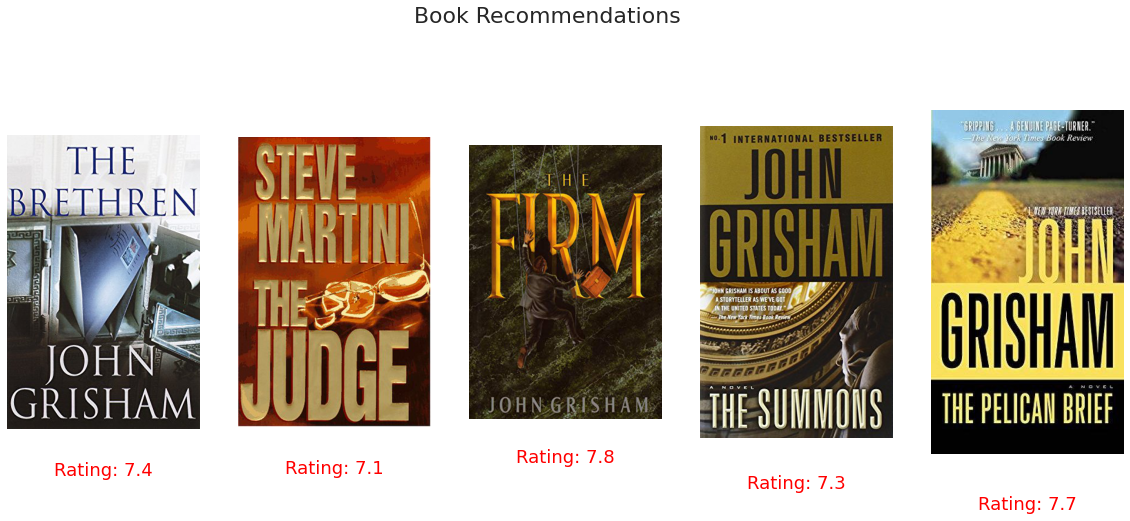

In [ ]:
item_based_reco('A Painted House')

Book Recommendations  Similarity Score
0  Tuesdays with Morrie: An Old Man, a Young Man,...          0.866414
1         Nighttime Is My Time (Clark, Mary Higgins)          0.888439
2  Until the Real Thing Comes Along (Ballantine R...          0.903074
3                            The Secret Life of Bees          0.906795
4       My Sister's Keeper : A Novel (Picoult, Jodi)          0.907708

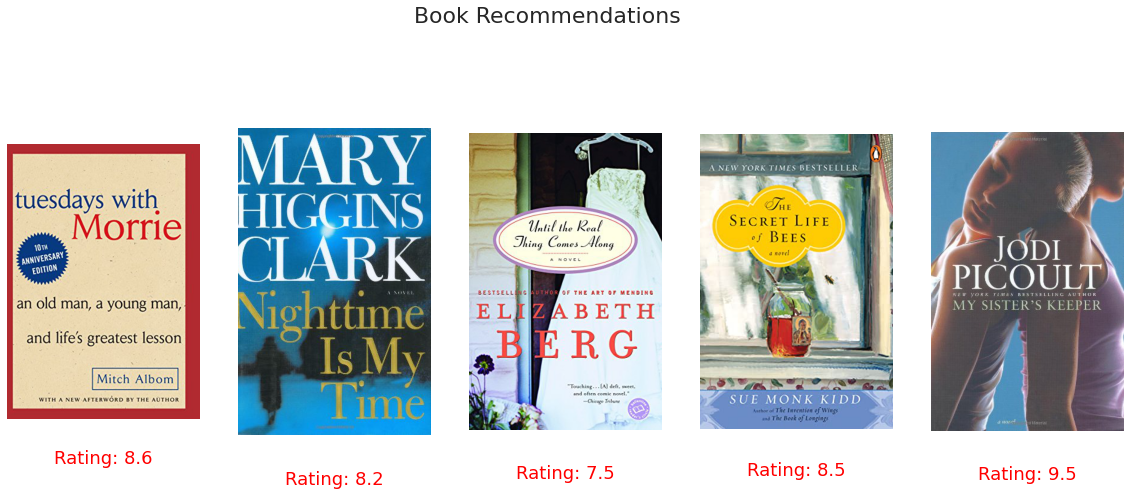

In [ ]:
item_based_reco('The Five People You Meet in Heaven')

##**User Based collaborative filtering**


In [ ]:
#Value counts based on user id
users=common_books['User-ID'].value_counts().sort_values(ascending=False)
#Finding top 30 % of users based on value counts
x=round(len(users)*(0.3))

In [ ]:
users[:10]

11676     2191
98391      458
153662     371
16795      362
95359      308
114368     294
104636     278
158295     234
60244      222
123883     213
Name: User-ID, dtype: int64

In [ ]:
#creating a list of top 30% users
top_users=users[:x].index.tolist()


In [ ]:
common_users = common_books[common_books["User-ID"].isin(top_users)]


In [ ]:
#creating user book matrix
user_book_df =common_users.pivot_table(index=["User-ID"], columns=["Book-Title"], values="Book-Rating") 
user_book_df.head()

Book-Title  'Salem's Lot  10 Lb. Penalty  101 Dalmatians  \
User-ID                                                    
26                   NaN             NaN             NaN   
99                   NaN             NaN             NaN   
114                  NaN             NaN             NaN   
165                  NaN             NaN             NaN   
242                  NaN             NaN             NaN   

Book-Title  14,000 Things to Be Happy About  16 Lighthouse Road  1984  \
User-ID                                                                 
26                                      NaN                 NaN   NaN   
99                                      NaN                 NaN   NaN   
114                                     NaN                 NaN   NaN   
165                                     NaN                 NaN   NaN   
242                                     NaN                 NaN   NaN   

Book-Title  1st to Die: A Novel  2001: A Space Odyssey  2010: Odyssey Two  \
User-ID                                                                     
26                          NaN                    NaN                NaN   
99                          NaN                    NaN                NaN   
114                         NaN                    NaN                NaN   
165                         NaN                    NaN                NaN   
242                         NaN                    NaN                NaN   

Book-Title  204 Rosewood Lane  ...  Zia  \
User-ID                        ...        
26                        NaN  ...  NaN   
99                        NaN  ...  NaN   
114                       NaN  ...  NaN   
165                       NaN  ...  NaN   
242                       NaN  ...  NaN   

Book-Title  Zlata's Diary: A Child's Life in Sarajevo  \
User-ID                                                 
26                                                NaN   
99                                                NaN   
114                                               NaN   
165                                               NaN   
242                                               NaN   

Book-Title  Zodiac: The Eco-Thriller  Zoya  ZwÃ?Â¶lf.  \O\" Is for Outlaw"  \
User-ID                                                                      
26                               NaN   NaN        NaN                  NaN   
99                               NaN   NaN        NaN                  NaN   
114                              NaN   NaN        NaN                  NaN   
165                              NaN   NaN        NaN                  NaN   
242                              NaN   NaN        NaN                  NaN   

Book-Title  \Surely You're Joking, Mr. Feynman!\": Adventures of a Curious Character"  \
User-ID                                                                                 
26                                                        NaN                           
99                                                        NaN                           
114                                                       NaN                           
165                                                       NaN                           
242                                                       NaN                           

Book-Title   e  iI Paradiso Degli Orchi  stardust  
User-ID                                            
26         NaN                      NaN       NaN  
99         NaN                      NaN       NaN  
114        NaN                      NaN       NaN  
165        NaN                      NaN       NaN  
242        NaN                      NaN       NaN  

[5 rows x 5040 columns]

In [ ]:
random_user=153662                                                        
  


In [ ]:
random_user_df = user_book_df[user_book_df.index == random_user]

books_rated = random_user_df.columns[random_user_df.notna().any()].tolist()

len(books_rated)

355

In [ ]:
#Number of similar users to random user
books_rated_df = user_book_df[books_rated]
books_rated_df.shape[0]

12461

In [ ]:
#All similar users and the number of books that rated by them
user_book_count = books_rated_df.T.notnull().sum()
user_book_count

User-ID
26        1
99        0
114       0
165       0
242       1
         ..
278773    0
278832    0
278843    2
278851    0
278854    0
Length: 12461, dtype: int64

In [ ]:
user_book_count = user_book_count.reset_index()
user_book_count.columns = ["userId", "book_count"]
user_book_count

userId  book_count
0          26           1
1          99           0
2         114           0
3         165           0
4         242           1
...       ...         ...
12456  278773           0
12457  278832           0
12458  278843           2
12459  278851           0
12460  278854           0

[12461 rows x 2 columns]

In [ ]:
#selecting similar users to random user who have rated atleast 10 books.
users_same_books = user_book_count[user_book_count["book_count"] > 10]["userId"]
users_same_books

214        5582
464       11676
526       12982
549       13552
689       16795
          ...  
11728    261829
11809    264082
11884    265889
12221    273113
12256    274061
Name: userId, Length: 108, dtype: int64

In [ ]:
#Identifying Users with the Most Similar Behaviors to the User to Suggest
final_df1 = pd.concat([user_book_df[user_book_df.index.isin(users_same_books)],
                      random_user_df[books_rated]])

final_df1.head()

Book-Title  'Salem's Lot  10 Lb. Penalty  101 Dalmatians  \
User-ID                                                    
5582                 NaN             NaN             NaN   
11676                NaN             NaN             NaN   
12982                NaN             NaN             NaN   
13552                NaN             NaN             NaN   
16795                NaN             NaN             NaN   

Book-Title  14,000 Things to Be Happy About  16 Lighthouse Road  1984  \
User-ID                                                                 
5582                                    NaN                 NaN   NaN   
11676                                   7.0                 NaN  10.0   
12982                                   NaN                 NaN   NaN   
13552                                   NaN                 NaN   NaN   
16795                                   NaN                 NaN   8.0   

Book-Title  1st to Die: A Novel  2001: A Space Odyssey  2010: Odyssey Two  \
User-ID                                                                     
5582                        NaN                    NaN                NaN   
11676                       9.0                    NaN                NaN   
12982                       NaN                    NaN                NaN   
13552                       NaN                    NaN                NaN   
16795                       9.0                    NaN                NaN   

Book-Title  204 Rosewood Lane  ...  Zia  \
User-ID                        ...        
5582                      NaN  ...  NaN   
11676                     NaN  ...  5.0   
12982                     NaN  ...  NaN   
13552                     NaN  ...  NaN   
16795                     NaN  ...  NaN   

Book-Title  Zlata's Diary: A Child's Life in Sarajevo  \
User-ID                                                 
5582                                              NaN   
11676                                             NaN   
12982                                             NaN   
13552                                             NaN   
16795                                             NaN   

Book-Title  Zodiac: The Eco-Thriller  Zoya  ZwÃ?Â¶lf.  \O\" Is for Outlaw"  \
User-ID                                                                      
5582                             NaN   NaN        NaN                  NaN   
11676                            9.0   7.0        7.0                  7.0   
12982                            NaN   NaN        NaN                  NaN   
13552                            NaN  10.0        NaN                  NaN   
16795                            NaN   6.0        NaN                  NaN   

Book-Title  \Surely You're Joking, Mr. Feynman!\": Adventures of a Curious Character"  \
User-ID                                                                                 
5582                                                      NaN                           
11676                                                     7.0                           
12982                                                     NaN                           
13552                                                     NaN                           
16795                                                     NaN                           

Book-Title   e  iI Paradiso Degli Orchi  stardust  
User-ID                                            
5582       NaN                      NaN       NaN  
11676      NaN                      NaN       8.0  
12982      NaN                      NaN       NaN  
13552      NaN                      NaN       NaN  
16795      NaN                      NaN       NaN  

[5 rows x 5040 columns]

In [ ]:
#Finding correlation between users to random user
final_df1.T.corr()

User-ID    5582      11676     12982     13552     16795     23872     25981   \
User-ID                                                                         
5582     1.000000 -0.237062       NaN  0.738549 -0.282256 -0.114708       NaN   
11676   -0.237062  1.000000  0.258279 -0.145811 -0.048862  0.217792 -0.242124   
12982         NaN  0.258279  1.000000 -0.285241  0.161515       NaN       NaN   
13552    0.738549 -0.145811 -0.285241  1.000000  0.109988  0.408794  0.544892   
16795   -0.282256 -0.048862  0.161515  0.109988  1.000000  0.330407 -0.152112   
...           ...       ...       ...       ...       ...       ...       ...   
264082        NaN  0.292036       NaN -0.710047 -0.235435  0.693375       NaN   
265889  -0.720577  0.270708       NaN  0.565916  0.337995       NaN -1.000000   
273113        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
274061        NaN  0.052918  1.000000 -0.169031  0.668153       NaN  0.250000   
153662   0.134388  0.076231 -0.276653  0.090369 -0.034824  0.325853       NaN   

User-ID    30276     31315     31826   ...        248718    254465  \
User-ID                                ...                           
5582          NaN  0.943242       NaN  ...  1.000000e+00       NaN   
11676    0.063454 -0.039281  0.003654  ...  2.287587e-01 -0.070111   
12982         NaN -0.500000       NaN  ...           NaN       NaN   
13552    0.946729  0.167724       NaN  ...  1.262402e-16       NaN   
16795    0.550016  0.349094 -0.009938  ... -3.098899e-01 -0.012868   
...           ...       ...       ...  ...           ...       ...   
264082        NaN -0.149705       NaN  ...           NaN       NaN   
265889   1.000000  0.800641       NaN  ...           NaN       NaN   
273113        NaN       NaN       NaN  ...           NaN       NaN   
274061        NaN       NaN -0.078811  ...           NaN       NaN   
153662   0.213177  0.220689       NaN  ...  8.661311e-01  0.129704   

User-ID        258185        258534    261829    264082    265889  273113  \
User-ID                                                                     
5582              NaN           NaN -0.722806       NaN -0.720577     NaN   
11676   -8.641687e-02 -4.361405e-02 -0.028817  0.292036  0.270708     NaN   
12982             NaN           NaN -0.866025       NaN       NaN     NaN   
13552   -2.357023e-01 -5.147105e-16 -0.049029 -0.710047  0.565916     NaN   
16795    5.000000e-01 -2.586622e-01  0.114549 -0.235435  0.337995     NaN   
...               ...           ...       ...       ...       ...     ...   
264082            NaN  1.000000e+00       NaN  1.000000       NaN     NaN   
265889   4.662524e-01           NaN       NaN       NaN  1.000000     NaN   
273113            NaN           NaN       NaN       NaN       NaN     NaN   
274061            NaN           NaN  0.301511       NaN       NaN     NaN   
153662  -9.723459e-17 -5.547659e-02  0.138156  0.138507  0.441324     NaN   

User-ID    274061    153662  
User-ID                      
5582          NaN  0.134388  
11676    0.052918  0.076231  
12982    1.000000 -0.276653  
13552   -0.169031  0.090369  
16795    0.668153 -0.034824  
...           ...       ...  
264082        NaN  0.138507  
265889        NaN  0.441324  
273113        NaN       NaN  
274061   1.000000       NaN  
153662        NaN  1.000000  

[109 rows x 109 columns]

In [ ]:
corr_df = final_df1.T.corr().unstack().sort_values().drop_duplicates()
corr_df = pd.DataFrame(corr_df, columns=["corr"])
corr_df.index.names = ['user_id_1', 'user_id_2']
corr_df = corr_df.reset_index()
corr_df.head()

user_id_1  user_id_2  corr
0     264082     137742  -1.0
1     137742     102647  -1.0
2     211426      30276  -1.0
3      30276      25981  -1.0
4     226545      23872  -1.0

In [ ]:
# We can choose users with more than 0.70 correlation with selected user.
similar_users = corr_df[(corr_df['corr'] >= 0.60) & (corr_df['user_id_1'] == random_user)][['user_id_2','corr']]
similar_users = similar_users.reset_index(drop=True)
similar_users.rename(columns={'user_id_2':'User-ID',
                              'corr':'Correlations'}, inplace=True)
similar_users


User-ID  Correlations
0    35859      0.624568
1   190708      0.673796
2   228764      0.710032
3   228764      0.710032
4   177090      0.789802
5   177090      0.789802
6   248718      0.866131

In [ ]:
#a reader can be good correlate with our user, but it maybe voted low rating points. Therefore, we should take into account also ratings.
# Hence, we can recommend good rating books to readers.

# So, we should calculate Weighted Score.

similar_users_df = similar_users.merge(ratings, how='inner',on='User-ID')
similar_users_df = similar_users_df.merge(books,how='inner', on='ISBN')
similar_users_df = similar_users_df[similar_users_df['User-ID'] != random_user]

# Calculation Weighted Score
similar_users_df['Weighted Score'] = (0.4 * similar_users_df['Correlations'] + 0.6 * (similar_users_df['Book-Rating'] / 10)) / 2

In [ ]:
similar_users_df.sort_values(by='Weighted Score',ascending=False)

similar_users_df.groupby('User-ID').agg({'Weighted Score':'mean'})

Weighted Score
User-ID                
35859          0.156162
177090         0.199524
190708         0.177837
228764         0.161406
248718         0.378085

In [ ]:
# Finally, we can calculate the weighted score on books. Additionally, a threshold has to be determined for the score, in this case 8.5,
# so that the recommender system do not recommend to the users all of the books which have scores.
recommendation_df = similar_users_df.groupby('Book-Title').agg({'Weighted Score':'mean'}).reset_index()
recommendation_df_by_score = recommendation_df[recommendation_df["Weighted Score"] > 0.40].sort_values(by='Weighted Score',ascending=False)
recommendation_df_by_score = recommendation_df_by_score.merge(books, how='inner',on='Book-Title')
recommendation_df_by_score

Book-Title  Weighted Score  \
0                                 METHUSELAH'S CHILDREN        0.473226   
1     Day of Atonement (Peter Decker &amp; Rina Laza...        0.473226   
2     Day of Atonement (Peter Decker &amp; Rina Laza...        0.473226   
3     The Npr Guide to Building a Classical Cd Colle...        0.473226   
4                                        Crystal singer        0.473226   
...                                                 ...             ...   
1117                Dark Shadows : AngÃ©lique's Descent        0.404759   
1118                                  Roses for Dummies        0.404070   
1119                                  Roses for Dummies        0.404070   
1120  Vendetta: The Giant Novel (Star Trek the Next ...        0.404070   
1121  The Divine Secrets of the Ya-Ya Sisterhood: A ...        0.402969   

            ISBN         Book-Author  Year-Of-Publication  \
0     0671655973  Robert A. Heinlein                 1986   
1     0449148246      Faye Kellerman                 1992   
2     044900323X      Faye Kellerman                 1998   
3     156305051X          Ted Libbey                 1994   
4     0345285980      Anne McCaffrey                 1982   
...          ...                 ...                  ...   
1117  0061057517         Lara Parker                 1998   
1118  0764550314       Lance Walheim                 1997   
1119  0764552023      Lance  Walheim                 2000   
1120  0671741454         Peter David                 1991   
1121  0060502258       Rebecca Wells                 2002   

                  Publisher  \
0                      Baen   
1             Fawcett Books   
2             Fawcett Books   
3            Workman Pub Co   
4                Ballantine   
...                     ...   
1117    HarperEntertainment   
1118  John Wiley &amp; Sons   
1119            For Dummies   
1120              Star Trek   
1121            HarperTorch   

                                            Image-URL-S  \
0     http://images.amazon.com/images/P/0671655973.0...   
1     http://images.amazon.com/images/P/0449148246.0...   
2     http://images.amazon.com/images/P/044900323X.0...   
3     http://images.amazon.com/images/P/156305051X.0...   
4     http://images.amazon.com/images/P/0345285980.0...   
...                                                 ...   
1117  http://images.amazon.com/images/P/0061057517.0...   
1118  http://images.amazon.com/images/P/0764550314.0...   
1119  http://images.amazon.com/images/P/0764552023.0...   
1120  http://images.amazon.com/images/P/0671741454.0...   
1121  http://images.amazon.com/images/P/0060502258.0...   

                                            Image-URL-M  \
0     http://images.amazon.com/images/P/0671655973.0...   
1     http://images.amazon.com/images/P/0449148246.0...   
2     http://images.amazon.com/images/P/044900323X.0...   
3     http://images.amazon.com/images/P/156305051X.0...   
4     http://images.amazon.com/images/P/0345285980.0...   
...                                                 ...   
1117  http://images.amazon.com/images/P/0061057517.0...   
1118  http://images.amazon.com/images/P/0764550314.0...   
1119  http://images.amazon.com/images/P/0764552023.0...   
1120  http://images.amazon.com/images/P/0671741454.0...   
1121  http://images.amazon.com/images/P/0060502258.0...   

                                            Image-URL-L  
0     http://images.amazon.com/images/P/0671655973.0...  
1     http://images.amazon.com/images/P/0449148246.0...  
2     http://images.amazon.com/images/P/044900323X.0...  
3     http://images.amazon.com/images/P/156305051X.0...  
4     http://images.amazon.com/images/P/0345285980.0...  
...                                                 ...  
1117  http://images.amazon.com/images/P/0061057517.0...  
1118  http://images.amazon.com/images/P/0764550314.0...  
1119  http://images.amazon.com/images/P/0764552023.0...  
1120  http://images.amazon.com/images/P/

In [ ]:
# Lastly, we can determine a list to will be recommended.
recommended_list = recommendation_df_by_score.sort_values(by='Weighted Score',ascending=False).drop_duplicates(subset='Book-Title')['Book-Title'].head(10).to_list()
recommended_list

['Dear Dad: Letters from an Adult Child',
 'Coraline',
 'Wizard and Glass (The Dark Tower, Book 4)',
 "Basset Hounds: Everything About Purchase, Care, Nutrition, Breeding Behavior, and Training (Complete Pet Owner's Manuals)",
 "Been There Should'Ve Done That: 505 Tips for Making the Most of College",
 'The Stand: Complete and Uncut',
 'Dancing to Pay the Light Bill: Essays on New Mexico and the Southwest (Red Crane Literature Series)',
 'Stiff: The Curious Lives of Human Cadavers',
 'The Sound and the Fury (Vintage International)',
 'The Book of Questions']

In [ ]:
#Creating a function to recommend books based on user-user similarity.
def user_book_reco(user):
  recommended_list = recommendation_df_by_score.sort_values(by='Weighted Score',ascending=False).drop_duplicates(subset='Book-Title')['Book-Title'].head(10).to_list()
  lis=recommended_list[:6]
  data={'Book Recommendations':lis}


  fig, axs = plt.subplots(1, 6,figsize=(20,8))
  fig.suptitle('Book Recommendations', size = 22)
  for i in range(len(lis)):
    #plotting images of recommended books with average rating.
    url = books.loc[books['Book-Title'] ==lis[i],'Image-URL-L'][:1].values[0]
    im = Image.open(requests.get(url, stream=True).raw)
    axs[i].imshow(im)
    axs[i].axis("off")
    axs[i].set_title('Average Rating: {}'.format(round(common_books[common_books['Book-Title'] == lis[i]]['Book-Rating'].mean(),1)),
                  y=-0.18,
                      color="red",
                      fontsize=18)
    fig.show()
  return pd.DataFrame(data).reset_index(drop=True)


Book Recommendations
0              Dear Dad: Letters from an Adult Child
1                                           Coraline
2          Wizard and Glass (The Dark Tower, Book 4)
3  Basset Hounds: Everything About Purchase, Care...
4  Been There Should'Ve Done That: 505 Tips for M...
5                      The Stand: Complete and Uncut

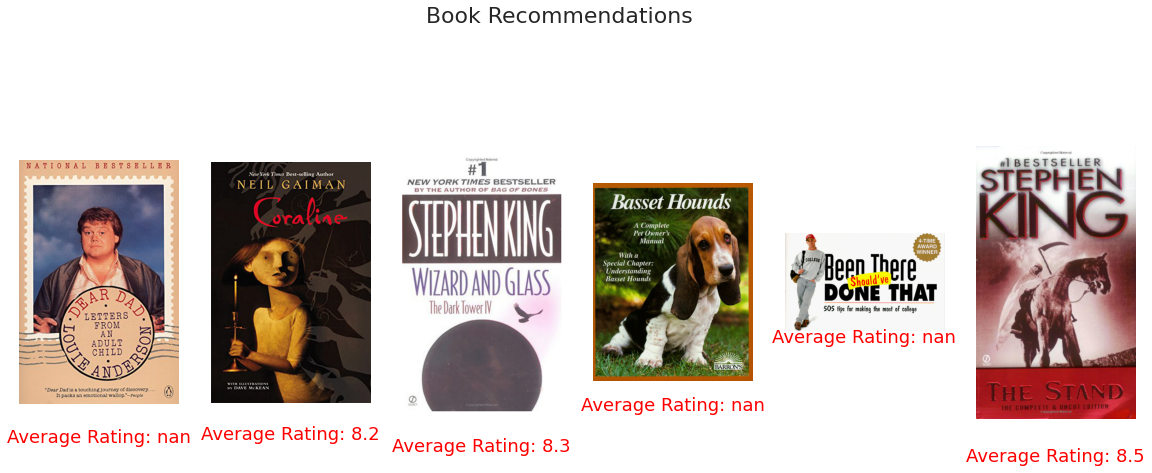

In [ ]:
#recommending books to random user.
user_book_reco(random_user)

#**Model-Based Collaborative Filtering**

Recommender systems have a problem known as user cold-start, in which it is hard to provide personalized recommendations for users with none or a very few number of consumed items, due to the lack of information to model their preferences.

In [ ]:
import scipy
from scipy.sparse.linalg import svds
from sklearn.model_selection import train_test_split

In [ ]:
pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 30.6 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1633722 sha256=229f96949a2f602f255fedfc727e3a376a1a7993b24d981294ed364a0692fea1
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [ ]:
from surprise import Dataset, Reader
from surprise import SVD, NMF
from surprise.model_selection import cross_validate, train_test_split, GridSearchCV

In [ ]:
df=common_books.copy()
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df[['User-ID','Book-Title','Book-Rating']], reader)

In [ ]:
model_svd = SVD()
cv_results_svd = cross_validate(model_svd, data, cv=3)
pd.DataFrame(cv_results_svd).mean()

test_rmse     1.619140
test_mae      1.253389
fit_time     13.059181
test_time     0.852580
dtype: float64

In [ ]:
model_nmf = NMF()
cv_results_nmf = cross_validate(model_nmf, data, cv=3)
pd.DataFrame(cv_results_nmf).mean()

test_rmse     2.479644
test_mae      2.085980
fit_time     17.656860
test_time     0.660090
dtype: float64


It's clear that for the given dataset much better results can be obtained with SVD approach - both in terms of accuracy and training / testing time.

##**Optimisation of SVD algorithm**<br>
Grid Search Cross Validation computes accuracy metrics for an algorithm on various combinations of parameters, over a cross-validation procedure. It's useful for finding the best configuration of parameters.
<br>
It is used to find the best setting of parameters:
<br>
n_factors - the number of factors<br>
n_epochs - the number of iteration of the SGD procedure<br>
lr_all - the learning rate for all parameters<br>
reg_all - the regularization term for all parameters<br>
As a result, regarding the majority of parameters, the default setting is the most optimal one. The improvement obtained with Grid Search is very small.

In [ ]:
param_grid = {'n_factors': [80,100],
              'n_epochs': [5, 20],
              'lr_all': [0.002, 0.005],
              'reg_all': [0.2, 0.4]}

gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
gs.fit(data)

print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

1.6077757543085462
{'n_factors': 80, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.2}



##**Analysis of Collaborative Filtering model results**
In this part, let's examine in detail the results obtained by the SVD model that provided the best RMSE score.

In [ ]:
trainset, testset = train_test_split(data, test_size=0.2)

model = SVD(n_factors=80, n_epochs=20, lr_all=0.005, reg_all=0.2)
model.fit(trainset)
predictions = model.test(testset)

In [ ]:
predictions

[Prediction(uid=269087, iid='My Dream of You', r_ui=9.0, est=7.450325228598473, details={'was_impossible': False}),
 Prediction(uid=107244, iid='B Is for Burglar (Kinsey Millhone Mysteries (Paperback))', r_ui=10.0, est=8.985336524362538, details={'was_impossible': False}),
 Prediction(uid=14051, iid='Airframe', r_ui=9.0, est=7.493452034394808, details={'was_impossible': False}),
 Prediction(uid=221114, iid='Love and Marriage', r_ui=7.0, est=7.698944365252712, details={'was_impossible': False}),
 Prediction(uid=88499, iid="Tuesdays with Morrie: An Old Man, a Young Man, and Life's Greatest Lesson", r_ui=9.0, est=8.296063691632444, details={'was_impossible': False}),
 Prediction(uid=84897, iid='Bel Canto: A Novel', r_ui=8.0, est=7.085035420012566, details={'was_impossible': False}),
 Prediction(uid=242083, iid='Tales from Margaritaville: Fictional Facts and Factual Fictions', r_ui=2.0, est=7.153114612352292, details={'was_impossible': False}),
 Prediction(uid=124983, iid='Tricky Business'

In [ ]:
df_pred = pd.DataFrame(predictions, columns=['user_id', 'book_title', 'actual_rating', 'pred_rating', 'details'])
df_pred['impossible'] = df_pred['details'].apply(lambda x: x['was_impossible'])
df_pred['pred_rating_round'] = df_pred['pred_rating'].round()
df_pred['abs_err'] = abs(df_pred['pred_rating'] - df_pred['actual_rating'])
df_pred.drop(['details'], axis=1, inplace=True)
df_pred.head(6)

user_id                                         book_title  actual_rating  \
0   269087                                    My Dream of You            9.0   
1   107244  B Is for Burglar (Kinsey Millhone Mysteries (P...           10.0   
2    14051                                           Airframe            9.0   
3   221114                                  Love and Marriage            7.0   
4    88499  Tuesdays with Morrie: An Old Man, a Young Man,...            9.0   
5    84897                                 Bel Canto: A Novel            8.0   

   pred_rating  impossible  pred_rating_round   abs_err  
0     7.450325       False                7.0  1.549675  
1     8.985337       False                9.0  1.014663  
2     7.493452       False                7.0  1.506548  
3     7.698944       False                8.0  0.698944  
4     8.296064       False                8.0  0.703936  
5     7.085035       False                7.0  0.914965

Distribution of actual and predicted ratings in the test set
According to the distribution of actual ratings of books in the test set, the biggest part of users give positive scores - between 7 and 10. The mode equals 8 but count of ratings 7, 9, 10 is also noticeable. The distribution of predicted ratings in the test set is visibly different. One more time, 8 is a mode but scores 7, 9 and 10 are clearly less frequent.
<br>
It shows that the recommender system is not perfect and it cannot reflect the real distribution of book ratings.

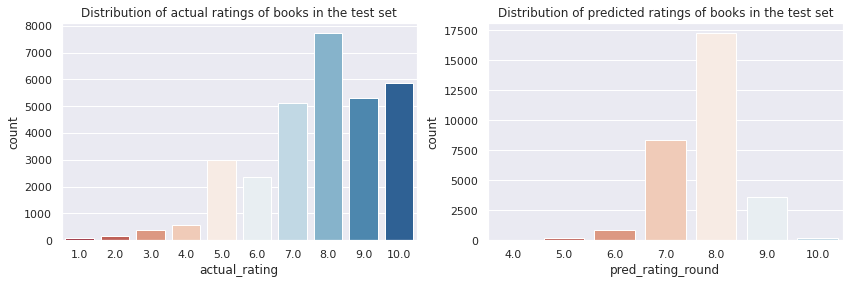

In [ ]:
palette = sns.color_palette("RdBu", 10)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

sns.countplot(x='actual_rating', data=df_pred, palette=palette, ax=ax1)
ax1.set_title('Distribution of actual ratings of books in the test set')

sns.countplot(x='pred_rating_round', data=df_pred, palette=palette, ax=ax2)
ax2.set_title('Distribution of predicted ratings of books in the test set')

plt.show()

##**Finding top n recommendation**.

In [ ]:
from collections import defaultdict

In [ ]:
def get_top_n(predictions, n=6):
  """Return the top-N recommendation for each user from a set of predictions.
  Args:
      predictions(list of Prediction objects): The list of predictions, as
          returned by the test method of an algorithm.
      n(int): The number of recommendation to output for each user. Default
          is 10.
  Returns:
  A dict where keys are user (raw) ids and values are lists of tuples:
      [(raw item id, rating estimation), ...] of size n.
  """

  # First map the predictions to each user.
  top_n = defaultdict(list)
  for uid, iid, true_r, est, _ in predictions:
      top_n[uid].append((iid, est))

  # Then sort the predictions for each user and retrieve the k highest ones.
  for uid, user_ratings in top_n.items():
      user_ratings.sort(key=lambda x: x[1], reverse=True)
      top_n[uid] = user_ratings[:n]

  return top_n

In [ ]:
top_n=get_top_n(predictions, n=6)
top_n

defaultdict(list,
            {269087: [('My Dream of You', 7.450325228598473)],
             107244: [('The Firm', 9.11862646304786),
              ('B Is for Burglar (Kinsey Millhone Mysteries (Paperback))',
               8.985336524362538),
              ('Sphere', 8.636083991509835)],
             14051: [('Airframe', 7.493452034394808)],
             221114: [('Love and Marriage', 7.698944365252712)],
             88499: [("Tuesdays with Morrie: An Old Man, a Young Man, and Life's Greatest Lesson",
               8.296063691632444)],
             84897: [('Bel Canto: A Novel', 7.085035420012566),
              ('Abraham : A Journey to the Heart of Three Faiths',
               6.754868745844982),
              ('The Saving Graces: A Novel', 6.642261037554462)],
             242083: [('Harry Potter and the Goblet of Fire (Book 4)',
               8.382326795156242),
              ("Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))",
               8.36814850755179),

In [ ]:
#creating a function to recommend books based on svd model
def model_based_reco(user_id):
    
    lis1=[v[0] for v in top_n[user_id]]
    n=len(lis1)
    lis=[v[0] for v in top_n[user_id]][:n]
    Actual_Rating=df_pred[(df_pred['user_id']==user_id) & (df_pred['book_title'].isin(lis))]['actual_rating']
    #Rating=common_books[common_books['Book-Title'].isin(lis)][['Book-Title','Book-Rating']]
    #Average_Rating=Rating.groupby('Book-Title')['Book-Rating'].mean()[:n]
    predicted_rating=[v[1] for v in top_n[user_id]][:n]
    data={'Book Recommendations':lis ,'Actual_Rating_by_user':Actual_Rating ,'Predicted_rating':predicted_rating}
    
  
    fig, axs = plt.subplots(1, n,figsize=(20,8))
    fig.suptitle('Book Recommendations', size = 22)
    for i in range(len(lis)):
     #plotting the recommended books
      url = books.loc[books['Book-Title'] ==lis[i],'Image-URL-L'][:1].values[0]
      im = Image.open(requests.get(url, stream=True).raw)
      axs[i].imshow(im)
      axs[i].axis("off")
      axs[i].set_title('Average Rating: {}'.format(round(common_books[common_books['Book-Title'] == lis[i]]['Book-Rating'].mean(),1)),
                    y=-0.18,
                        color="red",
                        fontsize=18)
      fig.show()
    return pd.DataFrame(data).reset_index(drop=True)

Book Recommendations  Actual_Rating_by_user  Predicted_rating
0       A Civil Action                   10.0          8.748597
1          Plum Island                    9.0          8.608478
2   Skipping Christmas                   10.0          8.447469

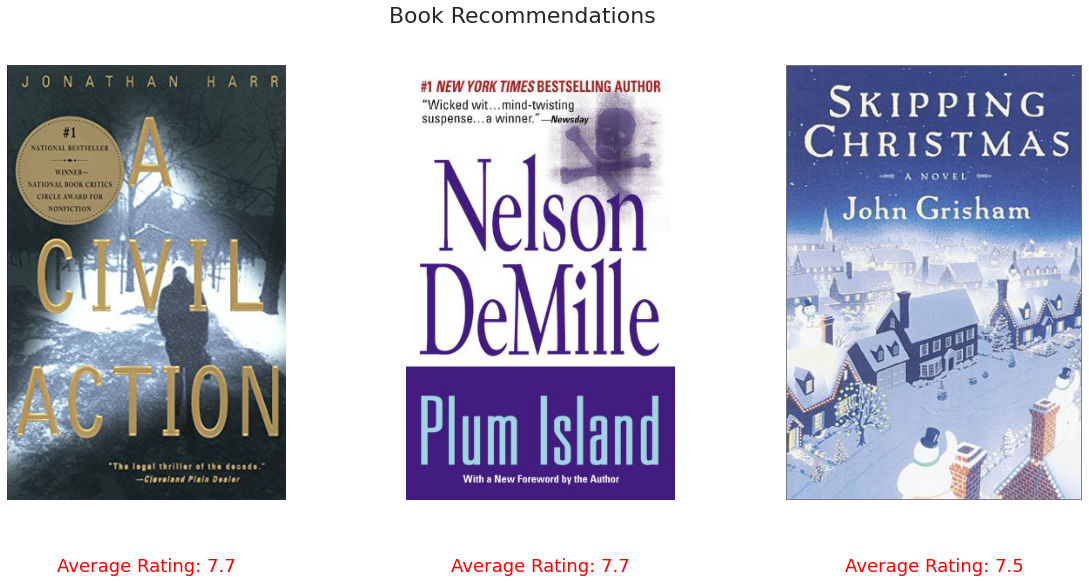

In [ ]:
model_based_reco(23511)

Book Recommendations  Actual_Rating_by_user  \
0  The Return of the King (The Lord of the Rings,...                    5.0   
1                                        Jungle Book                    5.0   
2                    I Know Why the Caged Bird Sings                    7.0   
3                                    Acceptable Risk                    7.0   
4                                   The Devil's Code                    5.0   

   Predicted_rating  
0          7.530680  
1          6.960180  
2          6.917741  
3          6.201210  
4          6.187194

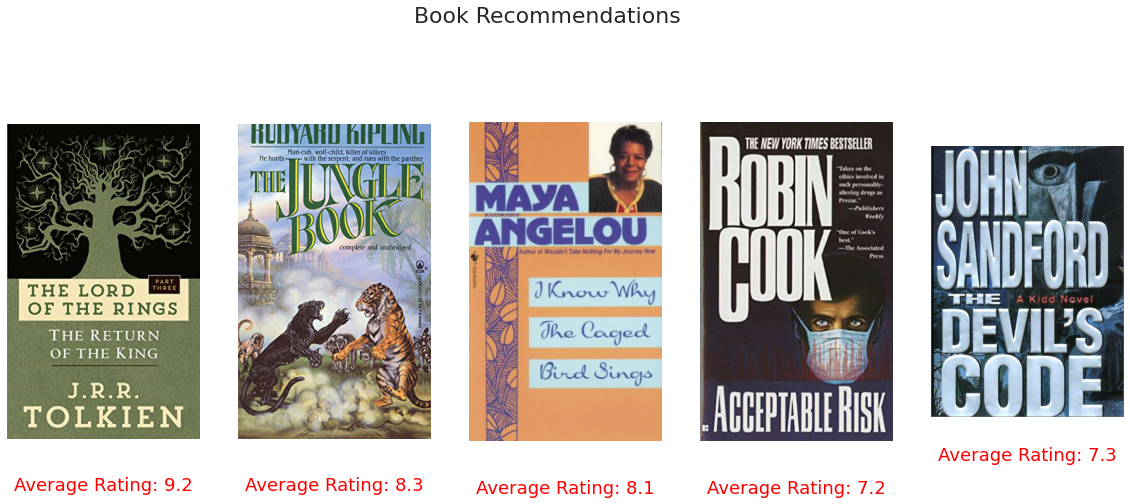

In [ ]:
model_based_reco(137118)

In [ ]:
#function to return precision and recall
def precision_recall_at_k(predictions, k, threshold):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set it to 0.

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set it to 0.

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    return precisions,recalls

In [ ]:
#getting the values of precision and recall
precisions, recalls = precision_recall_at_k(predictions, k=10, threshold=4)

In [ ]:
 # Precision and recall can then be averaged over all users
print(sum(prec for prec in precisions.values()) / len(precisions))
print(sum(rec for rec in recalls.values()) / len(recalls))

0.9751952176469085
0.9743374643080516


#**Collaborative Filtering based Recommendation System--(model based without surprise)**

In [ ]:
common_books.head()

ISBN              Book-Title Book-Author Year-Of-Publication  \
32  0399135782  The Kitchen God's Wife     Amy Tan                1991   
34  0399135782  The Kitchen God's Wife     Amy Tan                1991   
37  0399135782  The Kitchen God's Wife     Amy Tan                1991   
40  0399135782  The Kitchen God's Wife     Amy Tan                1991   
54  0399135782  The Kitchen God's Wife     Amy Tan                1991   

           Publisher  User-ID  Book-Rating                         Location  \
32  Putnam Pub Group    29526          9.0        knoxville, tennessee, usa   
34  Putnam Pub Group    46398          9.0          san antonio, texas, usa   
37  Putnam Pub Group    67958         10.0          idaho falls, idaho, usa   
40  Putnam Pub Group   115097          7.0                       seattle, ,   
54  Putnam Pub Group   230522          7.0  colorado springs, colorado, usa   

     Age  Avg_Rating  Total_No_Of_Users_Rated  
32  26.0       8.125                        8  
34  37.0       8.125                        8  
37  39.0       8.125                        8  
40  27.0       8.125                        8  
54  52.0       8.125                        8

In [ ]:

users_interactions_count_df = common_books.groupby(['ISBN', 'User-ID']).size().groupby('User-ID').size()
print('# of users: %d' % len(users_interactions_count_df))

users_with_enough_interactions_df = users_interactions_count_df[users_interactions_count_df >= 50].reset_index()[['User-ID']]
print('# of users with at least 50 interactions: %d' % len(users_with_enough_interactions_df))

# of users: 26994
# of users with at least 50 interactions: 311


In [ ]:
print('# of interactions: %d' % len(common_books))
interactions_from_selected_users_df = common_books.merge(users_with_enough_interactions_df, 
               how = 'right',
               left_on = 'User-ID',
               right_on = 'User-ID')
print('# of interactions from users with at least 5 interactions: %d' % len(interactions_from_selected_users_df))

# of interactions: 120829
# of interactions from users with at least 5 interactions: 27625


In [ ]:
interactions_from_selected_users_df.head(10)

ISBN                                         Book-Title  \
0  0142000663  The Grapes of Wrath: John Steinbeck Centennial...   
1  0836218256                Something Under the Bed Is Drooling   
2  0060256664                                    The Giving Tree   
3  0688149790                                           Babyhood   
4  0140386645                   The Westing Game (Now in Speak!)   
5  0345337662                         Interview with the Vampire   
6  0765345048                Kushiel's Chosen (Kushiel's Legacy)   
7  0590353403     Harry Potter and the Sorcerer's Stone (Book 1)   
8  0812533550      Ender's Game (Ender Wiggins Saga (Paperback))   
9  0886773784  Arrows of the Queen ( The Heralds of Valdemar,...   

        Book-Author Year-Of-Publication  \
0    John Steinbeck                2002   
1    Bill Watterson                1988   
2  Shel Silverstein                1964   
3       Paul Reiser                1997   
4      Ellen Raskin                1997   
5         Anne Rice                1993   
6  Jacqueline Carey                2003   
7     J. K. Rowling                1998   
8  Orson Scott Card                1986   
9   Mercedes Lackey                1996   

                                Publisher  User-ID  Book-Rating  \
0                           Penguin Books     2033         10.0   
1               Andrews McMeel Publishing     2033          9.0   
2                           HarperCollins     2033         10.0   
3            William Morrow &amp; Company     2033          8.0   
4  Penguin Putnam Books for Young Readers     2033          8.0   
5                        Ballantine Books     2033          5.0   
6                             Tor Fantasy     2033         10.0   
7                              Scholastic     2033          9.0   
8                               Tor Books     2033         10.0   
9                               Daw Books     2033         10.0   

               Location   Age  Avg_Rating  Total_No_Of_Users_Rated  
0  omaha, nebraska, usa  27.0    8.947368                       19  
1  omaha, nebraska, usa  27.0    8.857143                       14  
2  omaha, nebraska, usa  27.0    8.500000                        4  
3  omaha, nebraska, usa  27.0    7.500000                       10  
4  omaha, nebraska, usa  27.0    8.157895                       19  
5  omaha, nebraska, usa  27.0    7.839779                      181  
6  omaha, nebraska, usa  27.0    9.090909                       11  
7  omaha, nebraska, usa  27.0    9.144330                       97  
8  omaha, nebraska, usa  27.0    9.555556                        9  
9  omaha, nebraska, usa  27.0    8.357143                       14

In [ ]:
import math

In [ ]:
def smooth_user_preference(x):
    return math.log(1+x, 2)
    
interactions_full_df = interactions_from_selected_users_df.groupby(['ISBN', 'User-ID'])['Book-Rating'].sum().apply(smooth_user_preference).reset_index()
print('# of unique user/item interactions: %d' % len(interactions_full_df))
interactions_full_df.head()

# of unique user/item interactions: 27625


ISBN  User-ID  Book-Rating
0  0001048082   109901     3.169925
1  0002251760    37712     3.459432
2  0002251760   123883     2.584963
3  0002251760   274004     3.459432
4  0006485200   225087     3.459432

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
interactions_train_df, interactions_test_df = train_test_split(interactions_full_df,
                                   stratify=interactions_full_df['User-ID'], 
                                   test_size=0.20,
                                   random_state=42)

print('# interactions on Train set: %d' % len(interactions_train_df))
print('# interactions on Test set: %d' % len(interactions_test_df))

# interactions on Train set: 22100
# interactions on Test set: 5525


In [ ]:
interactions_test_df.head()

ISBN  User-ID  Book-Rating
8790   0385335881   218568     3.321928
13827  0446603716    28634     3.459432
24932  0804114609   136348     3.000000
5508   034541389X    95359     3.169925
5030   0345368975   196160     3.321928

In [ ]:
#Creating a sparse pivot table with users in rows and items in columns
users_items_pivot_matrix_df = interactions_train_df.pivot(index='User-ID', 
                                                          columns='ISBN', 
                                                          values='Book-Rating').fillna(0)

users_items_pivot_matrix_df.head()

ISBN     0001048082  0002251760  0006485200  000649840X  000651202X  \
User-ID                                                               
2033            0.0         0.0         0.0         0.0         0.0   
2276            0.0         0.0         0.0         0.0         0.0   
4017            0.0         0.0         0.0         0.0         0.0   
5582            0.0         0.0         0.0         0.0         0.0   
6251            0.0         0.0         0.0         0.0         0.0   

ISBN     000651202x  0006550789  0006742939  0006742947  0007141076  ...  \
User-ID                                                              ...   
2033            0.0         0.0         0.0         0.0         0.0  ...   
2276            0.0         0.0         0.0         0.0         0.0  ...   
4017            0.0         0.0         0.0         0.0         0.0  ...   
5582            0.0         0.0         0.0         0.0         0.0  ...   
6251            0.0         0.0         0.0         0.0         0.0  ...   

ISBN     8845247414  9500722984  9501513092  9504905501  950491036X  \
User-ID                                                               
2033            0.0         0.0         0.0         0.0         0.0   
2276            0.0         0.0         0.0         0.0         0.0   
4017            0.0         0.0         0.0         0.0         0.0   
5582            0.0         0.0         0.0         0.0         0.0   
6251            0.0         0.0         0.0         0.0         0.0   

ISBN     9580412340  9681500555  B00001U0CP  B00006I4OX  B00009NDAN  
User-ID                                                              
2033            0.0         0.0         0.0         0.0         0.0  
2276            0.0         0.0         0.0         0.0         0.0  
4017            0.0         0.0         0.0         0.0         0.0  
5582            0.0         0.0         0.0         0.0         0.0  
6251            0.0         0.0         0.0         0.0         0.0  

[5 rows x 8207 columns]

In [ ]:
users_items_pivot_matrix = users_items_pivot_matrix_df.values
users_items_pivot_matrix[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
users_ids = list(users_items_pivot_matrix_df.index)
users_ids[:10]

[2033, 2276, 4017, 5582, 6251, 6543, 6563, 7346, 8067, 8245]

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds

In [ ]:
# The number of factors to factor the user-item matrix.
NUMBER_OF_FACTORS_MF = 80

#Performs matrix factorization of the original user item matrix
U, sigma, Vt = svds(users_items_pivot_matrix, k = NUMBER_OF_FACTORS_MF)

In [ ]:
users_items_pivot_matrix.shape

(311, 8207)

In [ ]:
U.shape

(311, 80)

In [ ]:
sigma = np.diag(sigma)
sigma.shape

(80, 80)

In [ ]:
Vt.shape

(80, 8207)

After the factorization, we try to to reconstruct the original matrix by multiplying its factors. The resulting matrix is not sparse any more. It was generated predictions for items the user have not yet interaction, which we will exploit for recommendations.

In [ ]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
all_user_predicted_ratings

array([[-0.03926783, -0.04207181, -0.02871207, ...,  0.0773091 ,
         0.00481114, -0.00503404],
       [ 0.03680238, -0.01926802, -0.06020491, ..., -0.03313189,
         0.02051583,  0.00951222],
       [-0.05001815, -0.02789692, -0.02735178, ...,  0.04571327,
        -0.10704867, -0.11424501],
       ...,
       [-0.00383116,  0.03646026, -0.01740395, ..., -0.02281819,
        -0.01863728, -0.05489312],
       [-0.00929254,  0.13040486, -0.02178763, ..., -0.00892417,
         0.00461987,  0.00451853],
       [-0.01021838,  0.14939135, -0.0716453 , ...,  0.06418148,
        -0.02034964,  0.01457395]])

In [ ]:
all_user_predicted_ratings.shape

(311, 8207)

In [ ]:
#Converting the reconstructed matrix back to a Pandas dataframe
cf_preds_df = pd.DataFrame(all_user_predicted_ratings, columns = users_items_pivot_matrix_df.columns, index=users_ids).transpose()
cf_preds_df.head()

2033      2276      4017      5582      6251      6543    \
ISBN                                                                     
0001048082 -0.039268  0.036802 -0.050018 -0.004304 -0.063174 -0.015304   
0002251760 -0.042072 -0.019268 -0.027897  0.129439  0.157015  0.021959   
0006485200 -0.028712 -0.060205 -0.027352 -0.090730  0.026130  0.027468   
000649840X -0.034788 -0.012781 -0.098287 -0.034781 -0.048195  0.036477   
000651202X -0.006914  0.012837  0.055419 -0.008361 -0.013225  0.001693   

              6563      7346      8067      8245    ...    270820    271448  \
ISBN                                                ...                       
0001048082  0.008576  0.004027 -0.021811 -0.018312  ...  0.061040  0.001589   
0002251760  0.036493 -0.050161 -0.068496 -0.162760  ... -0.020016 -0.238223   
0006485200 -0.014601  0.003798 -0.009023  0.094396  ...  0.027687 -0.085844   
000649840X  0.028625  0.007907 -0.046450  0.020658  ...  0.037397 -0.017334   
000651202X -0.022191  0.012651  0.017418 -0.008424  ... -0.019710 -0.049452   

              271705    273113    274004    274061    274301    275970  \
ISBN                                                                     
0001048082 -0.017187  0.013927 -0.014862  0.087009 -0.077911 -0.003831   
0002251760  0.202224  0.727740  0.273145  0.060591  0.162628  0.036460   
0006485200  0.012049 -0.039351  0.085251  0.077020  0.019091 -0.017404   
000649840X  0.049482  0.011491  0.023412 -0.009071  0.026058  0.011932   
000651202X  0.006993  0.018086  0.007673 -0.052079  0.060436  0.036992   

              276680    277427  
ISBN                            
0001048082 -0.009293 -0.010218  
0002251760  0.130405  0.149391  
0006485200 -0.021788 -0.071645  
000649840X  0.013968  0.001718  
000651202X  0.026603  0.090650  

[5 rows x 311 columns]

In [ ]:
len(cf_preds_df.columns)

311

In [ ]:
global books
books.head()

ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author Year-Of-Publication                   Publisher  \
0    Mark P. O. Morford                2002     Oxford University Press   
1  Richard Bruce Wright                2001       HarperFlamingo Canada   
2          Carlo D'Este                1991             HarperPerennial   
3      Gina Bari Kolata                1999        Farrar Straus Giroux   
4       E. J. W. Barber                1999  W. W. Norton &amp; Company   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-M  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-L  
0  http://images.amazon.com/images/P/0195153448.0...  
1  http://images.amazon.com/images/P/0002005018.0...  
2  http://images.amazon.com/images/P/0060973129.0...  
3  http://images.amazon.com/images/P/0374157065.0...  
4  http://images.amazon.com/images/P/0393045218.0...

In [ ]:
class CFRecommender:
    
    MODEL_NAME = 'Collaborative Filtering'
    
    def __init__(self, cf_predictions_df):
        self.cf_predictions_df = cf_predictions_df
        
    def get_model_name(self):
        return self.MODEL_NAME
        
    def recommend_items(self, user_id, items_to_ignore=[], topn=10):
        # Get and sort the user's predictions
        sorted_user_predictions = self.cf_predictions_df[user_id].sort_values(ascending=False).reset_index().rename(columns={user_id: 'recStrength'})

        # Recommend the highest predicted rating content that the user hasn't seen yet.
        recommendations_df = sorted_user_predictions[~sorted_user_predictions['ISBN'].isin(items_to_ignore)].sort_values('recStrength', ascending = False).head(topn)
        recommendations_df=recommendations_df.merge(books,on='ISBN',how='inner')
        recommendations_df=recommendations_df[['ISBN','Book-Title','recStrength']]

        return recommendations_df



cf_recommender_model = CFRecommender(cf_preds_df)

In [ ]:
#Indexing by personId to speed up the searches during evaluation
interactions_full_indexed_df = interactions_full_df.set_index('User-ID')
interactions_train_indexed_df = interactions_train_df.set_index('User-ID')
interactions_test_indexed_df = interactions_test_df.set_index('User-ID')

In [ ]:
def get_items_interacted(UserID, interactions_df):
    interacted_items = interactions_df.loc[UserID]['ISBN']
    return set(interacted_items if type(interacted_items) == pd.Series else [interacted_items])

In [ ]:
class ModelRecommender:

    # Function for getting the set of items which a user has not interacted with
    def get_not_interacted_items_sample(self, UserID, sample_size, seed=42):
        interacted_items = get_items_interacted(UserID, interactions_full_indexed_df)
        all_items = set(common_books['ISBN'])
        non_interacted_items = all_items - interacted_items

        random.seed(seed)
        non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
        return set(non_interacted_items_sample)

    # Function to verify whether a particular item_id was present in the set of top N recommended items
    def _verify_hit_top_n(self, item_id, recommended_items, topn):        
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index
    
    # Function to evaluate the performance of model for each user
    def evaluate_model_for_user(self, model, person_id):
        
        # Getting the items in test set
        interacted_values_testset = interactions_test_indexed_df.loc[person_id]
        
        if type(interacted_values_testset['ISBN']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['ISBN'])
        else:
            person_interacted_items_testset = set([int(interacted_values_testset['ISBN'])])
            
        interacted_items_count_testset = len(person_interacted_items_testset) 

        # Getting a ranked recommendation list from the model for a given user
        person_recs_df = model.recommend_items(person_id, items_to_ignore=get_items_interacted(person_id, interactions_train_indexed_df),topn=10000000000)
        print('Recommendation for User-ID = ',person_id)
        print(person_recs_df.head(10))

        # Function to evaluate the performance of model at overall level
    def recommend_book(self, model ,userid):
        
        person_metrics = self.evaluate_model_for_user(model, userid)  
        return

model_recommender = ModelRecommender()    

**Let's recommend books to User-Id 69078 and see the results.**

In [ ]:
print(list(interactions_full_indexed_df.index.values))

[109901, 37712, 123883, 274004, 225087, 149908, 158226, 180651, 76626, 94347, 274004, 30711, 56399, 76626, 196077, 60244, 105517, 180651, 7346, 109574, 157273, 225087, 101876, 160558, 197364, 227447, 235105, 95359, 248718, 271448, 93629, 190708, 60707, 125774, 165308, 204864, 16634, 38023, 251844, 38023, 16634, 55492, 122429, 203240, 219683, 16634, 38023, 126736, 38023, 251844, 16634, 251844, 171118, 55490, 260897, 125519, 270820, 123883, 32773, 88693, 7346, 60244, 125519, 8681, 69078, 12538, 52584, 110934, 113270, 128835, 150979, 179734, 209516, 229741, 269566, 277427, 12538, 7346, 52584, 78973, 150979, 52584, 125519, 128835, 196160, 16634, 172742, 2276, 52917, 93629, 66942, 98391, 36907, 82497, 98391, 114368, 242006, 265889, 98391, 258185, 98391, 258185, 110973, 4017, 10560, 115435, 149908, 224349, 112001, 76626, 29526, 165308, 251844, 265889, 271705, 98391, 27472, 101606, 261829, 98391, 235105, 66680, 98391, 125774, 258185, 98391, 234359, 265889, 53220, 65584, 13552, 16795, 31315, 2

In [ ]:
user=int(input("Enter User ID from above list for book recommendation  "))
model_recommender.recommend_book(cf_recommender_model,user)

Enter User ID from above list for book recommendation  123883
Recommendation for User-ID =  123883
         ISBN                                Book-Title  recStrength
0  0380808072                                First Lady     1.803246
1  0380794489               Lady Be Good (Avon Romance)     1.797872
2  0671670069                            Guardian Angel     1.627315
3  0515135216                             Dark Symphony     1.467984
4  0066211220                   Breathing Room: A Novel     1.234857
5  0380897393                          When Love Awaits     1.037817
6  0373218427                             From This Day     1.032653
7  0380753022  Gentle Rogue (Malory Novels (Paperback))     1.025513
8  0671021001     She's Come Undone (Oprah's Book Club)     1.018993
9  0515127833                               River's End     1.014421


# **Evaluate**
### In Recommender Systems, there are a set metrics commonly used for evaluation. We choose to work with **Top-N accuracy metrics**, which evaluates the accuracy of the top recommendations provided to a user, comparing to the items the user has actually interacted in test set.

### This evaluation method works as follows:

* ### For each user
    * ### For each item the user has interacted in test set
        * ### Sample 100 other items the user has never interacted.   
        * ### Ask the recommender model to produce a ranked list of recommended items, from a set composed of one interacted item and the 100 non-interacted items
        * ### Compute the Top-N accuracy metrics for this user and interacted item from the recommendations ranked list
* ###  Aggregate the global Top-N accuracy metrics

In [ ]:
#Top-N accuracy metrics consts
EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS = 100

class ModelEvaluator:

    # Function for getting the set of items which a user has not interacted with
    def get_not_interacted_items_sample(self, UserID, sample_size, seed=42):
        interacted_items = get_items_interacted(UserID, interactions_full_indexed_df)
        all_items = set(common_books['ISBN'])
        non_interacted_items = all_items - interacted_items

        random.seed(seed)
        non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
        return set(non_interacted_items_sample)

    # Function to verify whether a particular item_id was present in the set of top N recommended items
    def _verify_hit_top_n(self, item_id, recommended_items, topn):        
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index
    
    # Function to evaluate the performance of model for each user
    def evaluate_model_for_user(self, model, person_id):
        
        # Getting the items in test set
        interacted_values_testset = interactions_test_indexed_df.loc[person_id]
        
        if type(interacted_values_testset['ISBN']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['ISBN'])
        else:
            person_interacted_items_testset = set((interacted_values_testset['ISBN']))
            
        interacted_items_count_testset = len(person_interacted_items_testset) 

        # Getting a ranked recommendation list from the model for a given user
        person_recs_df = model.recommend_items(person_id, items_to_ignore=get_items_interacted(person_id, interactions_train_indexed_df),topn=10000000000)

        hits_at_5_count = 0
        hits_at_10_count = 0
        
        # For each item the user has interacted in test set
        for item_id in person_interacted_items_testset:
            
            # Getting a random sample of 100 items the user has not interacted with
            non_interacted_items_sample = self.get_not_interacted_items_sample(person_id, sample_size=EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS, seed=item_id)    #%(2**32))

            # Combining the current interacted item with the 100 random items
            items_to_filter_recs = non_interacted_items_sample.union(set([item_id]))

            # Filtering only recommendations that are either the interacted item or from a random sample of 100 non-interacted items
            valid_recs_df = person_recs_df[person_recs_df['ISBN'].isin(items_to_filter_recs)]                    
            valid_recs = valid_recs_df['ISBN'].values
            
            # Verifying if the current interacted item is among the Top-N recommended items
            hit_at_5, index_at_5 = self._verify_hit_top_n(item_id, valid_recs, 5)
            hits_at_5_count += hit_at_5
            hit_at_10, index_at_10 = self._verify_hit_top_n(item_id, valid_recs, 10)
            hits_at_10_count += hit_at_10

        # Recall is the rate of the interacted items that are ranked among the Top-N recommended items
        recall_at_5 = hits_at_5_count / float(interacted_items_count_testset)
        recall_at_10 = hits_at_10_count / float(interacted_items_count_testset)

        person_metrics = {'hits@5_count':hits_at_5_count, 
                          'hits@10_count':hits_at_10_count, 
                          'interacted_count': interacted_items_count_testset,
                          'recall@5': recall_at_5,
                          'recall@10': recall_at_10}
        return person_metrics

    
    # Function to evaluate the performance of model at overall level
    def evaluate_model(self, model):
        
        people_metrics = []
        
        for idx, person_id in enumerate(list(interactions_test_indexed_df.index.unique().values)):    
            person_metrics = self.evaluate_model_for_user(model, person_id)  
            person_metrics['User-ID'] = person_id
            people_metrics.append(person_metrics)
            
        print('%d users processed' % idx)

        detailed_results_df = pd.DataFrame(people_metrics).sort_values('interacted_count', ascending=False)
        
        global_recall_at_5 = detailed_results_df['hits@5_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        global_recall_at_10 = detailed_results_df['hits@10_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        
        global_metrics = {'modelName': model.get_model_name(),
                          'recall@5': global_recall_at_5,
                          'recall@10': global_recall_at_10}    
        return global_metrics, detailed_results_df
    
model_evaluator = ModelEvaluator()    

In [ ]:
print('Evaluating Collaborative Filtering (SVD Matrix Factorization) model...')
cf_global_metrics, cf_detailed_results_df = model_evaluator.evaluate_model(cf_recommender_model)

print('\nGlobal metrics:\n%s' % cf_global_metrics)
cf_detailed_results_df.head(10)

Evaluating Collaborative Filtering (SVD Matrix Factorization) model...
310 users processed

Global metrics:
{'modelName': 'Collaborative Filtering', 'recall@5': 0.26461538461538464, 'recall@10': 0.3560180995475113}


hits@5_count  hits@10_count  interacted_count  recall@5  recall@10  \
14             25             34               149  0.167785   0.228188   
51             29             40                98  0.295918   0.408163   
118            13             20                84  0.154762   0.238095   
3              11             18                72  0.152778   0.250000   
15             22             32                72  0.305556   0.444444   
166             9             11                54  0.166667   0.203704   
114            25             30                52  0.480769   0.576923   
34              7             11                49  0.142857   0.224490   
61              8             11                48  0.166667   0.229167   
38              9             18                40  0.225000   0.450000   

     User-ID  
14     98391  
51    153662  
118    16795  
3      95359  
15    114368  
166   235105  
114   123883  
34     60244  
61    204864  
38     78973

#**Conclusion**